In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Cargar el dataset
data = pd.read_csv('/content/data.csv')

# Eliminar columnas no necesarias
data.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

data.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Exploración inicial
print("\nInformación general del dataset:")
print(data.info())
#print(data.describe())


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float

In [ ]:
print("\nRecuento de valores nulos por columna:")
print(data.isnull().sum())


Recuento de valores nulos por columna:
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [ ]:
# Estadísticas descriptivas para todas las variables numéricas
print("\nEstadísticas descriptivas de las variables numéricas:")
print(data.describe())


Estadísticas descriptivas de las variables numéricas:
       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.0


Distribución de la variable objetivo (diagnosis):
diagnosis
B    357
M    212
Name: count, dtype: int64


<ipython-input-8-1491c03092e2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=data, palette='viridis')


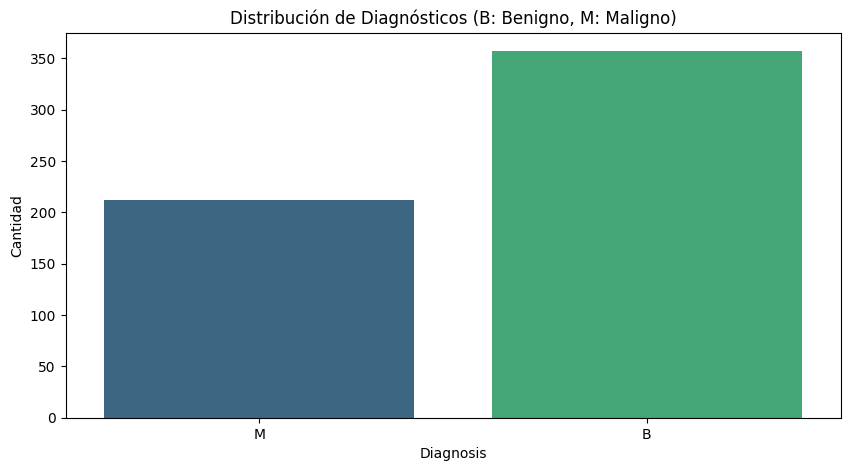

In [ ]:
# Verificar los valores únicos y su distribución en la variable objetivo
print("\nDistribución de la variable objetivo (diagnosis):")
print(data["diagnosis"].value_counts())

# Crear un gráfico de barras para la variable objetivo
plt.figure(figsize=(10, 5))
sns.countplot(x='diagnosis', data=data, palette='viridis')
plt.title("Distribución de Diagnósticos (B: Benigno, M: Maligno)")
plt.xlabel("Diagnosis")
plt.ylabel("Cantidad")
plt.show()

**Día 3: Identificación de Relaciones**

**Día 4: Limpieza de Datos, Escalado y Divisiòn**

In [ ]:
"""
Mapear M como 1 y B como 0 facilita el uso en algoritmos de aprendizaje supervisado.
"""
# Codificar la variable objetivo
print(data['diagnosis'].unique())
# eliminar espacio en blanco si tiene
data['diagnosis'] = data['diagnosis'].str.strip()
#
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})
print('Diagnosiss ', data['diagnosis'].unique())
# Verificar cambios
data.head(5)


['M' 'B']
Diagnosiss  [1 0]


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Normalización: Escalamos las características para que todas tengan un rango similar.

In [ ]:
"""
Escalar es importante para la regresión logística, ya que las características deben estar en la misma escala para un rendimiento óptimo.
StandardScaler ajusta las características a una distribución con media 0 y desviación estándar 1.
"""
from sklearn.preprocessing import StandardScaler

# Separar características y objetivo
X = data.drop(columns=['diagnosis'])  # Variables predictoras
y = data['diagnosis']  # Variable objetivo

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


División de Dataset (70 % 30%)

In [ ]:
"""
Se utiliza train_test_split de sklearn con el parámetro stratify=y para garantizar
que la proporción de clases (maligno y benigno) se mantenga en los conjuntos
 de entrenamiento y prueba.
"""
from sklearn.model_selection import train_test_split

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
"""
X_train, X_test: Conjuntos de entrenamiento y prueba para las características.
y_train, y_test: Conjuntos de entrenamiento y prueba para la variable objetivo.
"""

# Verificar tamaños
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


Tamaño del conjunto de entrenamiento: (398, 30)
Tamaño del conjunto de prueba: (171, 30)


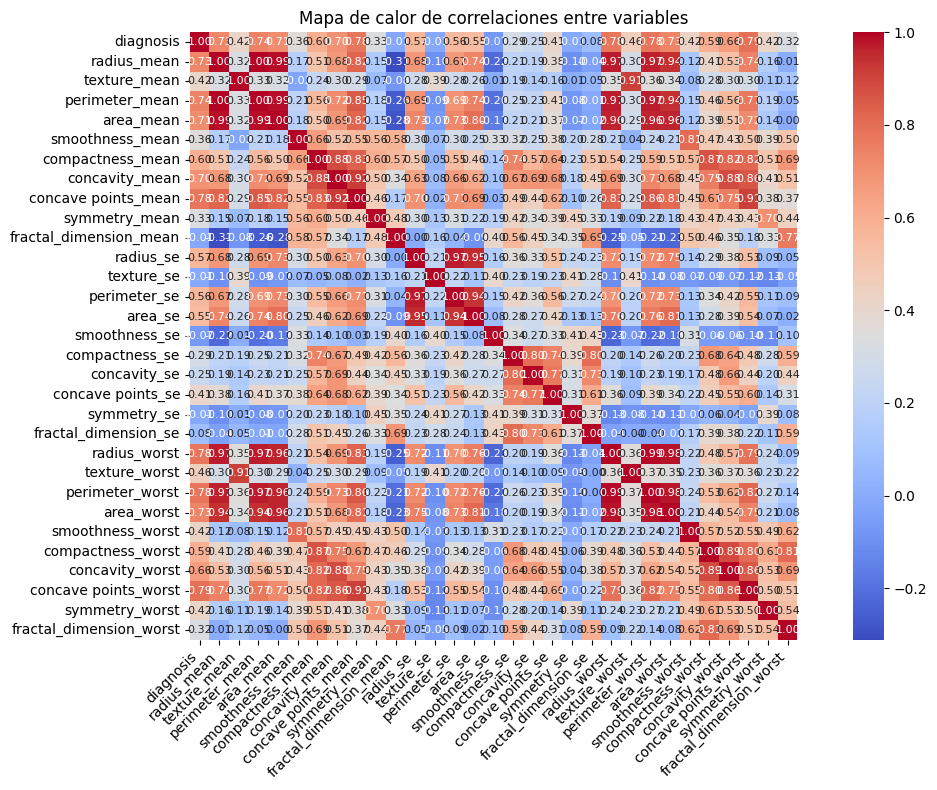


10 variables con mayor correlación con diagnosis:
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
concavity_worst         0.659610
Name: diagnosis, dtype: float64


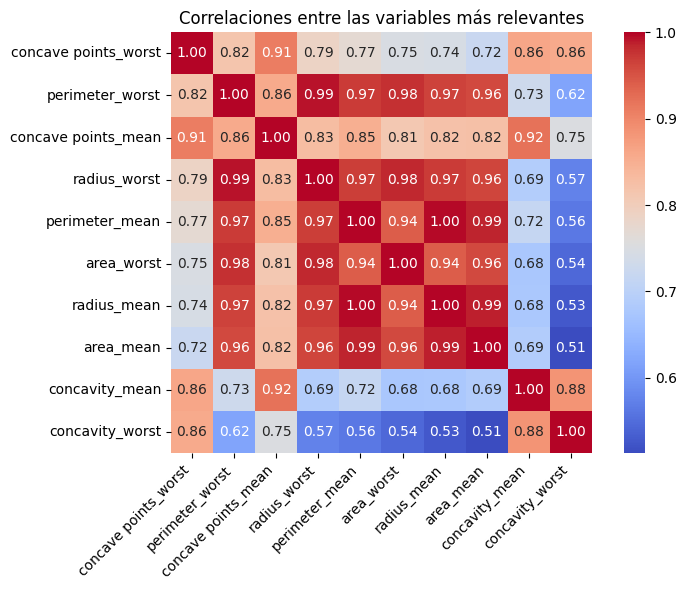

In [ ]:
# Crear la matriz de correlación
correlation_matrix = data.corr()

# Generar el heatmap completo (todas las variables)
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    square=True,
    annot_kws={"size": 8}  # Reducir el tamaño de las anotaciones
)
plt.title("Mapa de calor de correlaciones entre variables")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Seleccionar las 10 variables más correlacionadas con diagnosis
target_correlation = correlation_matrix['diagnosis'].sort_values(ascending=False)
top_features = target_correlation[1:11]  # Excluir 'diagnosis' (correlación consigo misma)

print("\n10 variables con mayor correlación con diagnosis:")
print(top_features)

# Crear un heatmap enfocado en las variables más correlacionadas
plt.figure(figsize=(8, 6))
sns.heatmap(
    data[top_features.index].corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    square=True,
    annot_kws={"size": 10}  # Tamaño adecuado para anotaciones
)
plt.title("Correlaciones entre las variables más relevantes")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Accuracy: 0.97
Precision: 0.98
Recall: 0.94
F1-Score: 0.96


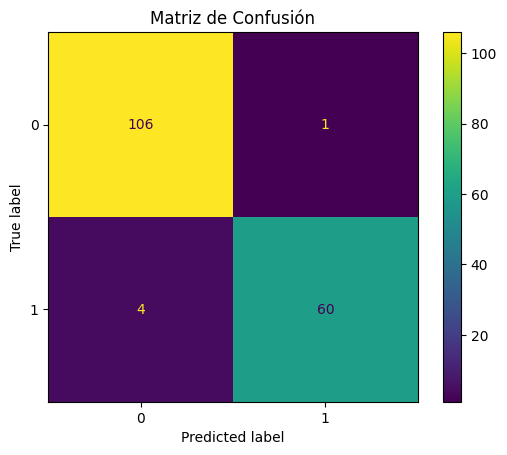

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Entrenar un modelo de regresión logística
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Generar matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap='viridis')
plt.title("Matriz de Confusión")
plt.show()

Se puede visualizar True Positive (TP): 60 casos donde el modelo predijo correctamente que era 1 (maligno).
True Negative (TN): 106 casos donde el modelo predijo correctamente que era 0 (benigno).
False Positive (FP): 1 caso donde el modelo predijo 1 (maligno) pero en realidad era 0 (benigno).
False Negative (FN): 4 casos donde el modelo predijo 0 (benigno) pero en realidad era 1 (maligno).

